# **PART C - Deep Learning (FASHION MNIST)**



### Implement an image classifier using a deep learning network. [Hint: You may wish to refer to papers on successful DL architectures such as AlexNet]

Write a short report (e.g. in Notebook) detailing your implementation, your
experiments and analysis. In particular, we'd like to know:

• How is your prediction task defined? And what is the meaning of the
output variable?

• How do you represent your data as features?

• Did you process the features in any way?

• Did you bring in any additional sources of data?

• How did you select which DL model to use?

• Did you try to tune the hyperparameters of the learning algorithm, and in
that case how?

• How do you evaluate the quality of your system?

• Can you say anything about the errors that the system makes? 
For a classification task, you may consider a confusion matrix.

• Is it possible to say something about which features the model considers
important? (Whether this is possible depends on the type of classifier
you are using)
• Provide a reference section for any papers, online articles, books,
publications that you have referenced.

# Prediction task definition :

To classify/recognise images of clothing types



# Output variable : 10 tyoes of clothings






• How do you represent your data as features?

• Did you process the features in any way?

• Did you bring in any additional sources of data?

• How did you select which DL model to use?

• Did you try to tune the hyperparameters of the learning algorithm, and in
that case how?

• How do you evaluate the quality of your system?

• Can you say anything about the errors that the system makes? 
For a classification task, you may consider a confusion matrix.

• Is it possible to say something about which features the model considers
important? (Whether this is possible depends on the type of classifier
you are using)
• Provide a reference section for any papers, online articles, books,
publications that you have referenced.

# LOAD DATA

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import os
import time


In [28]:
#load the mnist dataset

#already split, no need split into train and test. unless u want to split a validation set from train set
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) =fashion_mnist.load_data()


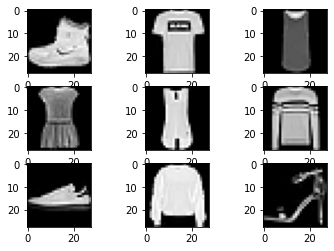

In [30]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# EDA

In [31]:
print(X_train.shape)
print(X_test.shape)

print(X_train[0])

print(y_train.shape)
print(y_train[:20])

print(y_test.shape)
print(y_test[:20])

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   

explore data using histogram

# Data Pre-processing

# **(a) Scaling**
- to normalize inputs from 0-255 to 0-1

In [10]:
#X - do scaling
# normalize inputs from 0-255 to 0-1 , no need call standard scalar
X_train = X_train / 255
X_test = X_test / 255

# **(b) One-Hot encoding**

so that 1 integer can represent 10 output neurons using softmax activation
convert 1 single column to 10 columns
-separate neuron for each output class

We need convert the digit integer into a representation that can fit 10 output neurons. And use softmax activation. One-hot encode the values. I0-I1-I2-I3-I4-I5-I6-I7-I8-I9
0-0-0-0-1-0-0-0-0-0

4=0-0-0-0-1-0-0-0-0-0



In [12]:

# Y - one hot encode outputs so as to represent 10 outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


# More Complex CNN

- less trainable weight (due to max pooling)







In [40]:
# Complex CNN Model
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.layers import BatchNormalization
from keras.optimizers import SGD

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data Pre-processing

num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

# flatten 28*28 pixel images to a 784 pixels vector (single array) for each image
#convert from integer to float (0 (black) -255(white) )
#convert float because matix multiplcation in neural network works better with float
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#X - do scaling
# normalize inputs from 0-255 to 0-1 , no need call standard scalar
X_train = X_train / 255
X_test = X_test / 255

# Y - one hot encode outputs so as to represent 10 outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

# build the model
# create model
model = Sequential()

#input layer

#Conv layer (filter layer) need input shape,28x28x1(NHWC) - 1 colour (monochrome)
#filter size (5,5), number of filters=32
#model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))#0.60%
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer is a compression layer - downsize image (insert in between conv layer but don't too much, the original image will be gone)

# Hidden layers
#model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(Conv2D(15, (3, 3), activation='relu', kernel_initializer='he_uniform'))#0.76
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) #tune from 0.2 to 0.5
model.add(Flatten())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))

#output layer - 10 neurons to predict the images of 10 digits (0-9)
model.add(Dense(num_classes, activation='softmax'))

# Compile model
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
print(model.summary())

# Fit the model
historyCOM = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, verbose=2)#0.60

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

784
10
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 375)               0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 375)      

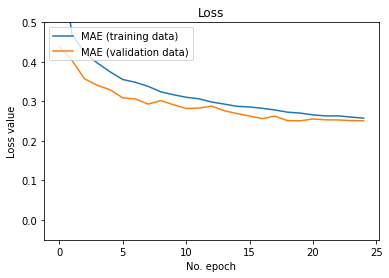

In [37]:
# Plot history: MAE
plt.plot(historyCOM.history['loss'], label='MAE (training data)')
plt.ylim(-0.05, 0.5)
plt.plot(historyCOM.history['val_loss'], label='MAE (validation data)')

plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.ylim(-0.05, 0.5)
plt.legend(loc="upper left")
plt.show()

References:

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/

https://www.kaggle.com/prashant111/mnist-deep-neural-network-with-keras

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00444-8

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


https://www.datacamp.com/community/tutorials/cnn-tensorflow-python
